In [1]:
import json

with open('results.json') as f:
    results = json.load(f)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_instances(features):
    fig, axes = plt.subplots(1, 30)
    fig.set_size_inches(40, 7)
    for i, ax in enumerate(axes):
        image = plt.imread(features[i][0])
        label = float(features[i][1])
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.set_axis_off()
    plt.show()

In [4]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id + 1}\n")
    print("Top-k tokens w.r.t. average attention score:")
    pair = results[concept_id]
    token_attn = [(t, a) for t, a, _ in pair["concept"]]
    for idx, (t, a) in enumerate(token_attn):
        print(f"\t{idx + 1}. {t}: {a:.4f}", sep=" ")
    print("\nTop-n images with largest absolute values of logits:")
    plot_instances(pair["feature"])
    print(100 * "-")

Concept #1

Top-k tokens w.r.t. average attention score:
	1. is: 0.4116
	2. round: 0.3590
	3. green: 0.3092
	4. four: 0.3024
	5. this: 0.2110
	6. color: 0.2037
	7. red: 0.1781
	8. up: 0.0811
	9. bottom: 0.0261
	10. right: 0.0134
	11. canvas: 0.0043
	12. angle: 0.0033
	13. shape: 0.0001
	14. left: 0.0000
	15. three: 0.0000
	16. has: 0.0000
	17. blue: 0.0000
	18. white: 0.0000
	19. rotate: 0.0000
	20. position: 0.0000
	21. unrotate: 0.0000
	22. blank: 0.0000
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


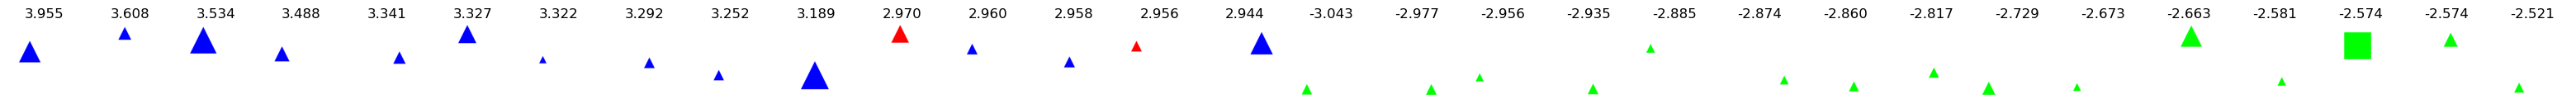

----------------------------------------------------------------------------------------------------
Concept #2

Top-k tokens w.r.t. average attention score:
	1. position: 0.4874
	2. is: 0.2635
	3. round: 0.2208
	4. color: 0.2171
	5. green: 0.1725
	6. shape: 0.0556
	7. up: 0.0221
	8. blank: 0.0111
	9. left: 0.0085
	10. rotate: 0.0017
	11. three: 0.0000
	12. has: 0.0000
	13. angle: 0.0000
	14. four: 0.0000
	15. blue: 0.0000
	16. red: 0.0000
	17. white: 0.0000
	18. bottom: 0.0000
	19. canvas: 0.0000
	20. this: 0.0000
	21. unrotate: 0.0000
	22. right: 0.0000
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


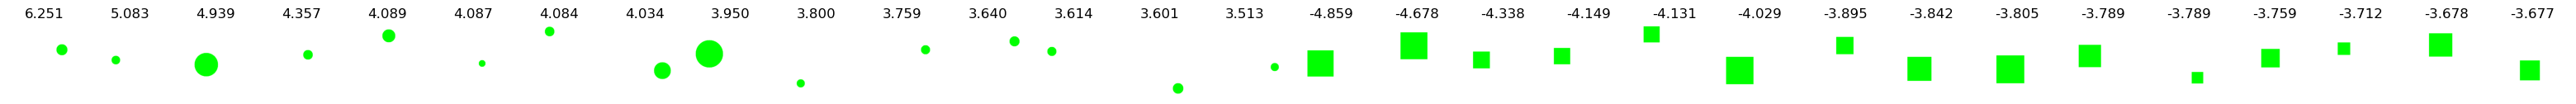

----------------------------------------------------------------------------------------------------
Concept #3

Top-k tokens w.r.t. average attention score:
	1. angle: 0.4028
	2. three: 0.2931
	3. blue: 0.2689
	4. green: 0.2357
	5. round: 0.1732
	6. right: 0.0972
	7. this: 0.0908
	8. bottom: 0.0820
	9. white: 0.0807
	10. shape: 0.0606
	11. red: 0.0569
	12. is: 0.0546
	13. four: 0.0457
	14. blank: 0.0399
	15. left: 0.0386
	16. up: 0.0256
	17. has: 0.0253
	18. position: 0.0037
	19. <pad>: 0.0000
	20. unrotate: 0.0000
	21. canvas: 0.0000
	22. color: 0.0000
	23. rotate: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


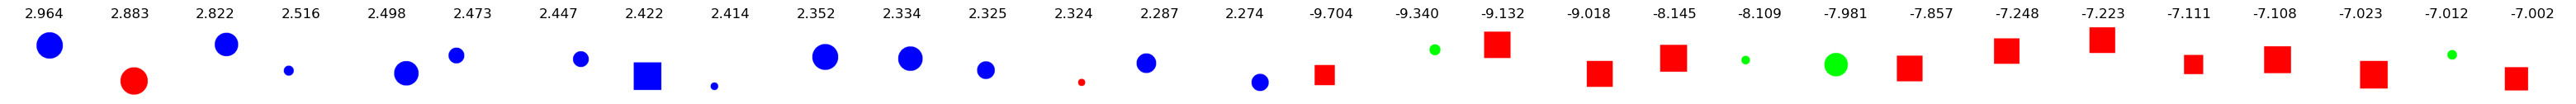

----------------------------------------------------------------------------------------------------
Concept #4

Top-k tokens w.r.t. average attention score:
	1. blank: 0.1534
	2. white: 0.1467
	3. canvas: 0.1400
	4. left: 0.1361
	5. bottom: 0.1305
	6. rotate: 0.1272
	7. shape: 0.1185
	8. color: 0.0905
	9. is: 0.0823
	10. this: 0.0813
	11. blue: 0.0804
	12. has: 0.0699
	13. position: 0.0543
	14. three: 0.0386
	15. round: 0.0385
	16. four: 0.0288
	17. up: 0.0282
	18. unrotate: 0.0265
	19. green: 0.0025
	20. right: 0.0000
	21. red: 0.0000
	22. angle: 0.0000
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


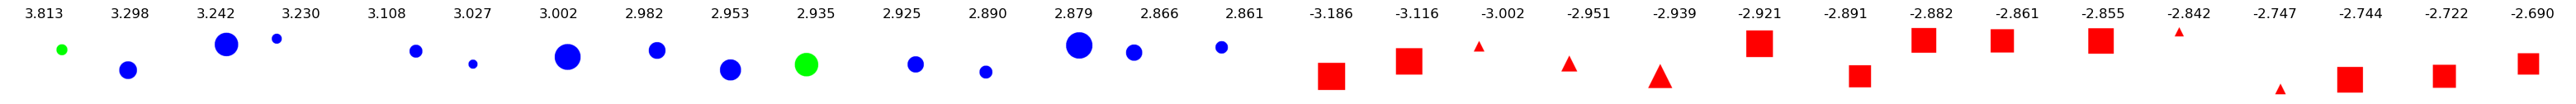

----------------------------------------------------------------------------------------------------
Concept #5

Top-k tokens w.r.t. average attention score:
	1. has: 0.3245
	2. red: 0.3241
	3. this: 0.2225
	4. shape: 0.1343
	5. position: 0.1235
	6. four: 0.1151
	7. up: 0.0708
	8. color: 0.0680
	9. green: 0.0511
	10. bottom: 0.0416
	11. right: 0.0260
	12. rotate: 0.0058
	13. blank: 0.0024
	14. <pad>: 0.0000
	15. is: 0.0000
	16. round: 0.0000
	17. blue: 0.0000
	18. left: 0.0000
	19. unrotate: 0.0000
	20. canvas: 0.0000
	21. white: 0.0000
	22. three: 0.0000
	23. angle: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


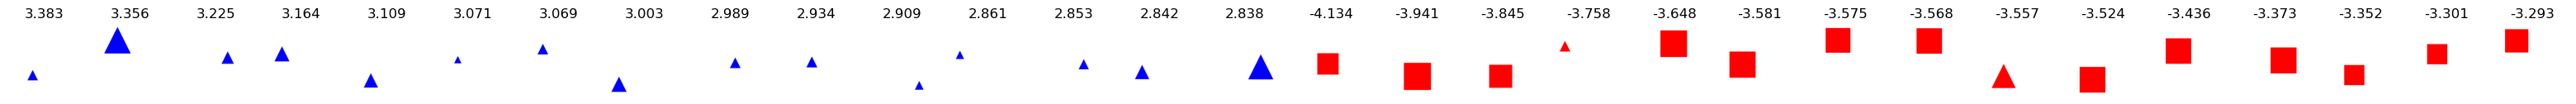

----------------------------------------------------------------------------------------------------
Concept #6

Top-k tokens w.r.t. average attention score:
	1. round: 0.3291
	2. four: 0.2904
	3. red: 0.2745
	4. green: 0.2525
	5. shape: 0.1712
	6. has: 0.1363
	7. this: 0.1306
	8. color: 0.1178
	9. canvas: 0.1059
	10. left: 0.0027
	11. blue: 0.0000
	12. three: 0.0000
	13. <pad>: 0.0000
	14. is: 0.0000
	15. bottom: 0.0000
	16. white: 0.0000
	17. unrotate: 0.0000
	18. position: 0.0000
	19. rotate: 0.0000
	20. right: 0.0000
	21. blank: 0.0000
	22. up: 0.0000
	23. angle: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


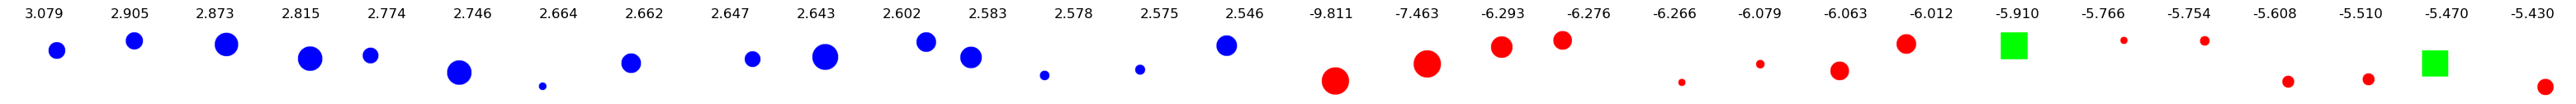

----------------------------------------------------------------------------------------------------
Concept #7

Top-k tokens w.r.t. average attention score:
	1. red: 0.5128
	2. has: 0.2694
	3. four: 0.2430
	4. color: 0.1964
	5. this: 0.1408
	6. shape: 0.0786
	7. canvas: 0.0760
	8. position: 0.0611
	9. up: 0.0240
	10. bottom: 0.0066
	11. rotate: 0.0015
	12. <pad>: 0.0000
	13. is: 0.0000
	14. round: 0.0000
	15. blue: 0.0000
	16. green: 0.0000
	17. right: 0.0000
	18. blank: 0.0000
	19. unrotate: 0.0000
	20. white: 0.0000
	21. left: 0.0000
	22. three: 0.0000
	23. angle: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


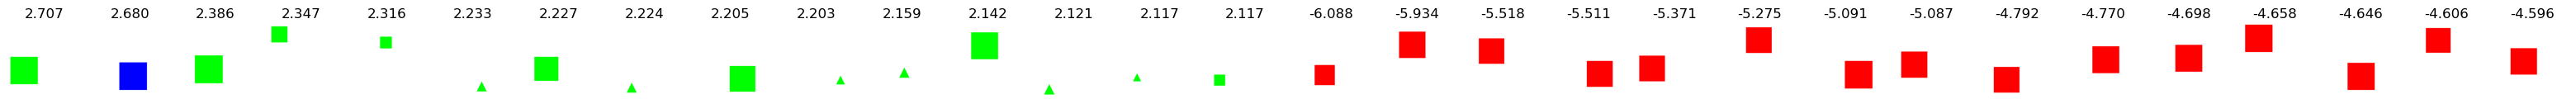

----------------------------------------------------------------------------------------------------
Concept #8

Top-k tokens w.r.t. average attention score:
	1. color: 0.3794
	2. four: 0.3028
	3. position: 0.2394
	4. red: 0.1755
	5. canvas: 0.1527
	6. has: 0.0814
	7. up: 0.0174
	8. rotate: 0.0104
	9. is: 0.0044
	10. green: 0.0000
	11. <pad>: 0.0000
	12. round: 0.0000
	13. blue: 0.0000
	14. three: 0.0000
	15. bottom: 0.0000
	16. unrotate: 0.0000
	17. white: 0.0000
	18. right: 0.0000
	19. shape: 0.0000
	20. this: 0.0000
	21. left: 0.0000
	22. blank: 0.0000
	23. angle: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


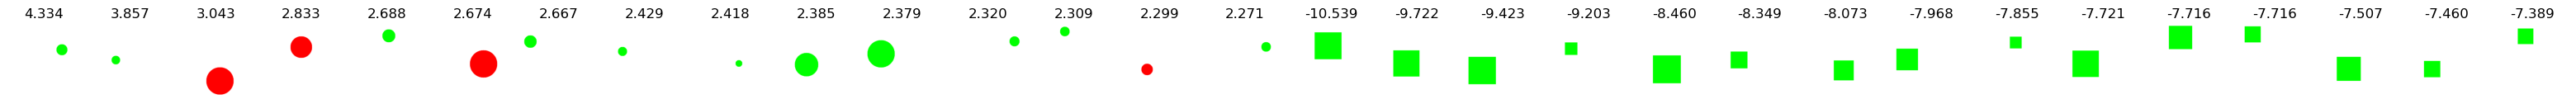

----------------------------------------------------------------------------------------------------
Concept #9

Top-k tokens w.r.t. average attention score:
	1. green: 0.3085
	2. has: 0.2660
	3. position: 0.2389
	4. four: 0.2234
	5. red: 0.1881
	6. this: 0.1453
	7. angle: 0.1085
	8. bottom: 0.0581
	9. up: 0.0520
	10. round: 0.0464
	11. shape: 0.0373
	12. is: 0.0337
	13. rotate: 0.0142
	14. <pad>: 0.0000
	15. blue: 0.0000
	16. unrotate: 0.0000
	17. blank: 0.0000
	18. right: 0.0000
	19. canvas: 0.0000
	20. color: 0.0000
	21. left: 0.0000
	22. white: 0.0000
	23. three: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


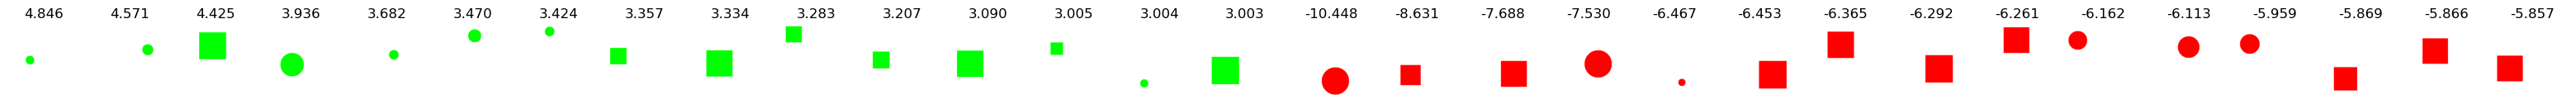

----------------------------------------------------------------------------------------------------
Concept #10

Top-k tokens w.r.t. average attention score:
	1. green: 0.4521
	2. this: 0.3698
	3. three: 0.3337
	4. round: 0.3221
	5. red: 0.3174
	6. is: 0.2876
	7. canvas: 0.0399
	8. white: 0.0178
	9. blank: 0.0125
	10. rotate: 0.0083
	11. four: 0.0000
	12. blue: 0.0000
	13. has: 0.0000
	14. angle: 0.0000
	15. unrotate: 0.0000
	16. bottom: 0.0000
	17. left: 0.0000
	18. position: 0.0000
	19. color: 0.0000
	20. shape: 0.0000
	21. right: 0.0000
	22. up: 0.0000
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


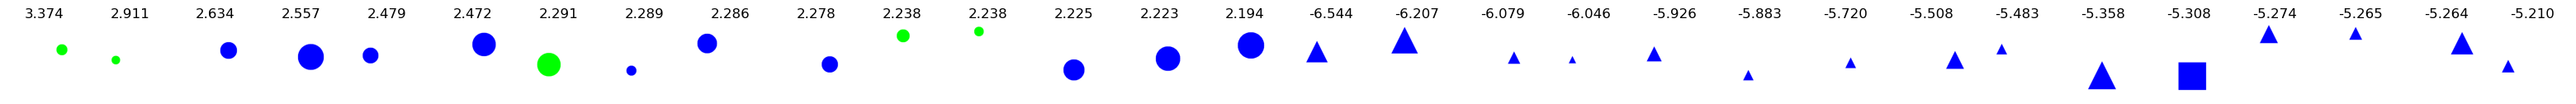

----------------------------------------------------------------------------------------------------


In [5]:
for i in range(10):

    visualize_concept(i)

In [17]:
import torch.nn as nn
import torch

cosine_sim = nn.CosineSimilarity(dim=1, eps=1e-6)

a = torch.randn((64, 100))
b = torch.randn((64, 100))

cosine_sim(a, b)

tensor([ 0.0133,  0.1659, -0.0823,  0.0442, -0.0309,  0.0934, -0.0757, -0.0641,
        -0.1840,  0.0089, -0.1936,  0.0805,  0.0278,  0.0895,  0.0049, -0.0992,
        -0.0088,  0.1968, -0.0701, -0.0782,  0.0476,  0.1419, -0.0147,  0.0005,
         0.0124, -0.1913,  0.0275,  0.0209, -0.0465, -0.0642, -0.0625, -0.0383,
         0.1409,  0.0695, -0.0525,  0.1744, -0.1573, -0.1510,  0.0967, -0.1393,
        -0.0389, -0.1527, -0.0866,  0.0334,  0.0165, -0.0451, -0.0454,  0.0395,
         0.1684, -0.0724, -0.1139,  0.0038, -0.1430, -0.1177,  0.0471, -0.1202,
         0.1645,  0.0446, -0.0765, -0.0820, -0.1085, -0.0679, -0.1956,  0.1704])